In [ ]:
!pip install asyncpraw
!pip install praw


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 4.2 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/soccomp/

/content/drive/MyDrive/soccomp


In [ ]:
import praw
import asyncpraw


In [ ]:
username = "Procrastin8-6474"
password = "socialButterfly123"

reddit = praw.Reddit(
    client_id = "UEkEmzWEUQBzGB8IFTJKqw",
    client_secret="8xRejb21KdJyKBYtBn5P6RCHtyflAw",
    username=username,
    password=password,
    user_agent="test script",
    check_for_async=False
    )

In [ ]:
print(reddit.read_only)
print(reddit.user.me())

False
Procrastin8-6474


In [ ]:
subreddit = reddit.subreddit("GradSchool")
for submission in subreddit.search("procrastination AND 'covid'",limit=10):
    print(submission.title)
    print(submission.selftext)

Advice for a major procrastinator in grad school?
Hello, I am in my first year in grad school. I just finished my first semester with straight A's but it was done through heavy amounts of stress and pressure in the last minute. I am now in the beginning of my second semester and I already feel myself slowly slipping back to my unhealthy old habits. Like today, I slept in and just procrastinated by watching YouTube videos instead of doing homework. My first semester of grad school brought my depression and anxiety back to surface (I am back on medication now) I actually quit my job to pursue my master's degree and I live with my family now. In undergrad, I would go to school and go to work on the weekends. Now that I don't have any work I am constantly surrounded by what I am studying including weekends. Its not that I don't like what I'm studying but I don't like having it around me 24/7 (is that weird?). Even though I didn't like my old job, it was actually my only source of a "social

In [ ]:
import datetime
import json
import time

def search_reddit(subreddit, keywords, posts_per_keyword, pause_time, limit=100):
  results = []
  keyword_count = 0
  seen_ids = set()
  for query in keywords:
    searchQuery = f"procrastination AND {query}" if query != "procrastination" else "procrastination"
    count = 0
    # print(searchQuery)
    for submission in reddit.subreddit(subreddit).search(searchQuery, limit=posts_per_keyword):
      if submission.id in seen_ids:
        continue
      seen_ids.add(submission.id)
      try:
        user_account_age = datetime.datetime.fromtimestamp(submission.author.created_utc).strftime('%Y-%m-%d') if submission.author else "Unknown"
      except AttributeError:
        user_account_age = "Unknown"
      post_data = {
          'id': submission.id,
          'title': submission.title,
          'post': submission.selftext,
          'subreddit': submission.subreddit.display_name,
          'query' : query,
          'url': submission.url,
          'date': datetime.datetime.fromtimestamp(submission.created).strftime('%Y-%m-%d'),
          'year': datetime.datetime.fromtimestamp(submission.created).year,
          'upvotes': submission.score,  # Reddit API provides 'score', which is net upvotes
          'comment_count': submission.num_comments,
          'upvote_ratio': submission.upvote_ratio,
          'username': submission.author.name if submission.author else "Deleted",
          'user_account_age': user_account_age,
          'timestamp': submission.created_utc,
      }
      results.append(post_data)

      count += 1

      if count >= posts_per_keyword:
        break

    keyword_count += 1
    if keyword_count % (100 // posts_per_keyword) == 0:  # Every time we reach the rate limit
            print(f"Pausing for {pause_time} seconds to respect the API limit...")
            time.sleep(pause_time)  # Pause the script to stay within the API limit

    time.sleep(pause_time)
  return results


In [ ]:


# query a subreddit for procrastination
keywords = ['Social media', 'Pandemic',
            'covid', 'Mental health', 'depression', 'stress', 'happiness',
            'sadness', 'academic', 'instagram', 'Facebook', 'Twitter',
            'Reddit', 'Youtube', 'tiktok', 'netflix', 'screen time', 'sleep', 'solutions',
            'exams', 'homework', 'assignments', 'social life', 'classes', 'procrastination'
            ]

print(len(keywords))


25


In [ ]:

results = search_reddit(subreddit="College", keywords=keywords, posts_per_keyword=10, pause_time=60)
#we try to get 4 posts per keyword for 25 keywords, cuz of 100 post limit per minute

with open(f"data.json", "w") as f:
    json.dump(results, f, indent=4)

In [ ]:
with open("data.json", "r") as f:
    data = json.load(f)

# Count the number of entries
num_entries = len(data)

print("Number of entries in data.json:", num_entries)

In [ ]:
results = search_reddit(subreddit="gradSchool", keywords=keywords, posts_per_keyword=10, pause_time=60)
#we try to get 4 posts per keyword for 25 keywords, cuz of 100 post limit per minute

# with open(f"data.json", "a") as f:
#     json.dump(results, f, indent=4)

Pausing for 60 seconds to respect the API limit...
Pausing for 60 seconds to respect the API limit...


In [ ]:
with open("data.json", "r") as f:
    data = json.load(f)

# Count the number of entries
num_entries = len(data)

print("Number of entries in data.json:", num_entries)

Number of entries in data.json: 1045


In [ ]:
results = search_reddit(subreddit="GetStudying", keywords=keywords, posts_per_keyword=10, pause_time=60)


try:
    with open("data.json", "r") as f:
        existing_data = json.load(f)
except FileNotFoundError:
    existing_data = []

existing_data.extend(results)

with open("data.json", "w") as f:
    json.dump(existing_data, f, indent=4)


Pausing for 60 seconds to respect the API limit...
Pausing for 60 seconds to respect the API limit...


In [ ]:
results = search_reddit(subreddit="productivity", keywords=keywords, posts_per_keyword=10, pause_time=60)


try:
    with open("data.json", "r") as f:
        existing_data = json.load(f)
except FileNotFoundError:
    existing_data = []

existing_data.extend(results)

with open("data.json", "w") as f:
    json.dump(existing_data, f, indent=4)

Pausing for 60 seconds to respect the API limit...
Pausing for 60 seconds to respect the API limit...


In [ ]:
results = search_reddit(subreddit="EngineeringStudents", keywords=keywords, posts_per_keyword=10, pause_time=60)


try:
    with open("data.json", "r") as f:
        existing_data = json.load(f)
except FileNotFoundError:
    existing_data = []

existing_data.extend(results)

with open("data.json", "w") as f:
    json.dump(existing_data, f, indent=4)

Pausing for 60 seconds to respect the API limit...
Pausing for 60 seconds to respect the API limit...


In [ ]:
results = search_reddit(subreddit="csMajors", keywords=keywords, posts_per_keyword=10, pause_time=60)


try:
    with open("data.json", "r") as f:
        existing_data = json.load(f)
except FileNotFoundError:
    existing_data = []

existing_data.extend(results)

with open("data.json", "w") as f:
    json.dump(existing_data, f, indent=4)

Pausing for 60 seconds to respect the API limit...
Pausing for 60 seconds to respect the API limit...


In [ ]:
results = search_reddit(subreddit="MedicalSchool", keywords=keywords, posts_per_keyword=10, pause_time=60)


try:
    with open("data.json", "r") as f:
        existing_data = json.load(f)
except FileNotFoundError:
    existing_data = []

existing_data.extend(results)

with open("data.json", "w") as f:
    json.dump(existing_data, f, indent=4)

Pausing for 60 seconds to respect the API limit...
Pausing for 60 seconds to respect the API limit...


In [ ]:
results = search_reddit(subreddit="professors", keywords=keywords, posts_per_keyword=10, pause_time=60)


try:
    with open("data.json", "r") as f:
        existing_data = json.load(f)
except FileNotFoundError:
    existing_data = []

existing_data.extend(results)

with open("data.json", "w") as f:
    json.dump(existing_data, f, indent=4)

Pausing for 60 seconds to respect the API limit...
Pausing for 60 seconds to respect the API limit...


#Exploratory data analysis


In [24]:
import json
with open("data.json", "r") as f:
    data = json.load(f)

# Count the number of entries
num_entries = len(data)

print("Number of entries in data.json:", num_entries)

Number of entries in data.json: 1045


In [11]:
columns = list(data[0].keys())
print(columns)

['id', 'title', 'post', 'subreddit', 'query', 'url', 'date', 'year', 'upvotes', 'comment_count', 'upvote_ratio', 'username', 'user_account_age', 'timestamp']


In [25]:
import pandas as pd
df = pd.DataFrame(data)
df.head()

data = df

In [26]:
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Ensure numerical data is the correct type
data['upvotes'] = data['upvotes'].astype(float)
data['comment_count'] = data['comment_count'].astype(float)
data['upvote_ratio'] = data['upvote_ratio'].astype(float)

# Extract month and year for seasonal analysis
data['month'] = data['date'].dt.month
data['week'] = data['date'].dt.isocalendar().week


In [14]:
print(data.describe())


                                date         year      upvotes  comment_count  \
count                           1045  1045.000000  1045.000000    1045.000000   
mean   2021-09-20 23:20:02.296650752  2021.231579   137.348325      24.721531   
min              2011-07-11 00:00:00  2011.000000     0.000000       0.000000   
25%              2020-10-06 00:00:00  2020.000000     5.000000       3.000000   
50%              2022-05-03 00:00:00  2022.000000    18.000000      10.000000   
75%              2023-07-01 00:00:00  2023.000000   104.000000      28.000000   
max              2024-04-12 00:00:00  2024.000000  4157.000000    1432.000000   
std                              NaN     2.423535   345.491578      60.494292   

       upvote_ratio     timestamp        month       week  
count   1045.000000  1.045000e+03  1045.000000     1045.0  
mean       0.898890  1.632226e+09     6.428708  26.074641  
min        0.130000  1.310356e+09     1.000000        1.0  
25%        0.870000  1.601961e

In [15]:
# Compute correlation matrix
correlation_matrix = data[['upvotes', 'comment_count', 'upvote_ratio', 'month', 'week']].corr()

# Print the correlation matrix
print(correlation_matrix)


                upvotes  comment_count  upvote_ratio     month      week
upvotes        1.000000       0.320881      0.195193  0.020857  0.022682
comment_count  0.320881       1.000000      0.105438  0.029625  0.027498
upvote_ratio   0.195193       0.105438      1.000000  0.017186  0.019338
month          0.020857       0.029625      0.017186  1.000000  0.992304
week           0.022682       0.027498      0.019338  0.992304  1.000000


In [27]:
# stress_keywords = ["stress", "anxiety", "depression", "mental health",
#                    "mental illness", "pressure",
#                     "tired", "burnout", "burnt out", "lost", "sad", "lonely", "useless", "impostor syndrome"]
# grade_keywords = ["grade", "gpa", "gpas", "marks", "scores", "tests", "exams"]

stress_keywords = [
    "Stress", "Anxiety", "Tension", "Pressure", "Overwhelmed", "Burnout",
    "Stressful", "Worry", "Distress", "Exhaustion", "Fatigue", "Overload",
    "Stressor", "Panic", "Strain", "Nervousness", "Overwork", "Overexertion",
    "Crisis", "Alarm", "Frustration", "Mental strain", "Emotional strain",
    "Cortisol", "Adrenaline", "Stress management", "Stress response", "Chronic stress",
    "Acute stress", "Psychological stress", "Physical stress", "Social stress",
    "Stress relief", "Stress reduction", "Stress symptoms", "Stress levels",
    "Stress factors", "De-stress", "Manage stress", "Coping with stress",
    "Stress therapy", "Stress treatment", "Stress test", "tired", "depressed",
]




grade_keywords = [
    "Grade",
    "Score",
    "Mark",
    "Result",
    "Evaluation",
    "Performance",
    "Assessment",
    "Outcome",
    "Achievement",
    "Progress",
    "Examination",
    "Test",
    "Pass",
    "Fail",
    "Percentile",
    "Ranking",
    "Grading",
    "Criteria",
    "Report",
    "Feedback",
    "GPA",
    "Transcript",
    "Final",
    "Average",
    "Classify",
    "Rating",
    "Standard",
    "Benchmark",
    "Evaluation",
    "Level",
    "Rating",
    "Judgment",
    "Scoring",
    "Assessment",
    "Appraisal",
    "Merit",
    "Performance",
    "Record",
    "Scholarship",
    "Honor",
    "Marking",
    "Degree",
    "Credential",
    "Pass/Fail",
    "Proficiency",
    "Standing",
    "Accreditation",
    "Certification",
    "Diploma",
    "Honors"
]



procrastination_keywords = [
    "Procrastination", "Delaying", "Postponing", "Avoidance", "Time management",
    "Last minute", "Stalling", "Dallying", "Dawdling", "Loafing", "Hesitation",
    "Time wasting", "Putting off", "Dragging feet", "Slacking", "Shirking",
    "Lethargy", "Indecision", "Inaction", "Deferring", "Tardiness", "Lateness",
    "Idling", "Prolonging", "Lollygagging", "Procrastinating habits", "Not doing",
    "Lazy", "Lack of motivation", "Lack of focus", "Inefficiency", "Unproductive",
    "Distractions", "Task avoidance", "Cramming", "Underachievement", "Perfectionism",
    "Overthinking", "Overplanning", "Fear of failure", "Task aversion", "Non-completion",
    "Scheduling issues", "Chronic procrastination", "Habitual delay", "Mental block",
    "Psychological resistance", "Academic procrastination", "Workplace procrastination",
    "Procrastinative behavior", "procras", "wasting time", "cannot focus", "lack of focus", "no ambition"
]


def keyword_check(text, keywords):
    return any(keyword in text.lower() for keyword in keywords)

# Create new columns based on these keywords
data['mentions_stress'] = data['post'].apply(lambda x: keyword_check(x, stress_keywords))
data['mentions_grades'] = data['post'].apply(lambda x: keyword_check(x, grade_keywords))
data['mentions_procrastination'] = data['post'].apply(lambda x: keyword_check(x, procrastination_keywords))

# Calculate correlations
correlation_matrix = data[['mentions_stress', 'mentions_grades', 'mentions_procrastination']].corr()

# Display the correlation matrix
print(correlation_matrix)



                          mentions_stress  mentions_grades  \
mentions_stress                  1.000000              NaN   
mentions_grades                       NaN              NaN   
mentions_procrastination         0.089482              NaN   

                          mentions_procrastination  
mentions_stress                           0.089482  
mentions_grades                                NaN  
mentions_procrastination                  1.000000  


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Procrastination, Stress, and Grades Related Metrics')
plt.show()


In [28]:
import spacy

nlp = spacy.load("en_core_web_sm")

def lemmatize_keywords(keywords):
    lemmatized_keywords = set()
    for keyword in keywords:
        doc = nlp(keyword)
        # Typically take the lemma of the first token assuming keywords are mostly single words
        lemmatized_keywords.update([token.lemma_ for token in doc])
    return lemmatized_keywords

# Lemmatize each of your keyword lists
stress_keywords_lemmatized = lemmatize_keywords(stress_keywords)
grade_keywords_lemmatized = lemmatize_keywords(grade_keywords)
procrastination_keywords_lemmatized = lemmatize_keywords(procrastination_keywords)

def keyword_check(text, lemmatized_keywords):
    doc = nlp(text.lower())  # Process the text with spaCy
    text_lemmas = {token.lemma_ for token in doc}  # Create a set of lemmas from the text
    return any(keyword in text_lemmas for keyword in lemmatized_keywords)

import pandas as pd

data['mentions_stress'] = data['post'].apply(lambda x: keyword_check(x, stress_keywords_lemmatized))
data['mentions_grades'] = data['post'].apply(lambda x: keyword_check(x, grade_keywords_lemmatized))
data['mentions_procrastination'] = data['post'].apply(lambda x: keyword_check(x, procrastination_keywords_lemmatized))

# Calculate and display the correlation matrix
correlation_matrix = data[['mentions_stress', 'mentions_grades', 'mentions_procrastination']].corr()
print(correlation_matrix)



                          mentions_stress  mentions_grades  \
mentions_stress                  1.000000         0.349138   
mentions_grades                  0.349138         1.000000   
mentions_procrastination         0.493629         0.346665   

                          mentions_procrastination  
mentions_stress                           0.493629  
mentions_grades                           0.346665  
mentions_procrastination                  1.000000  


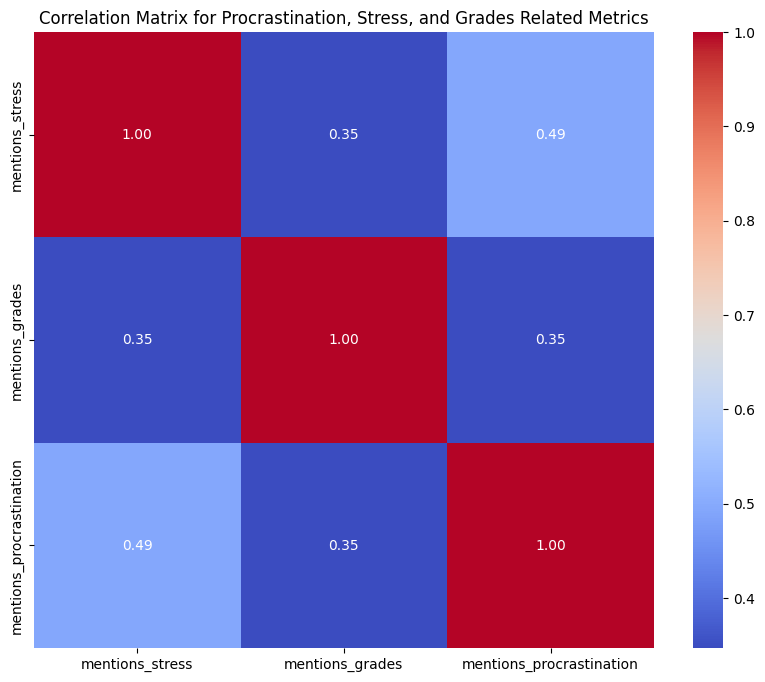

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Procrastination, Stress, and Grades Related Metrics')
plt.show()

In [ ]:
social_media_keywords = ['Facebook', 'Instagram', 'Twitter', 'Snapchat', 'TikTok', 'Netflix', 'YouTube',
                         'social media', 'post', 'share', 'like', 'comment', 'scrolling', 'watching'
                         'story', 'shorts', 'reels', 'videos', 'photos', 'tweets'
                         ]
data['mentions_social_media'] = data['post'].apply(lambda x: keyword_check(x, social_media_keywords)).astype(int)

# Calculate correlation matrix including social media mentions
correlation_matrix = data[['mentions_procrastination', 'mentions_stress', 'mentions_social_media', 'mentions_grades']].corr()
print(correlation_matrix)


                          mentions_procrastination  mentions_stress  \
mentions_procrastination                  1.000000         0.493629   
mentions_stress                           0.493629         1.000000   
mentions_social_media                     0.335320         0.347852   
mentions_grades                           0.346665         0.349138   

                          mentions_social_media  mentions_grades  
mentions_procrastination               0.335320         0.346665  
mentions_stress                        0.347852         0.349138  
mentions_social_media                  1.000000         0.309673  
mentions_grades                        0.309673         1.000000  


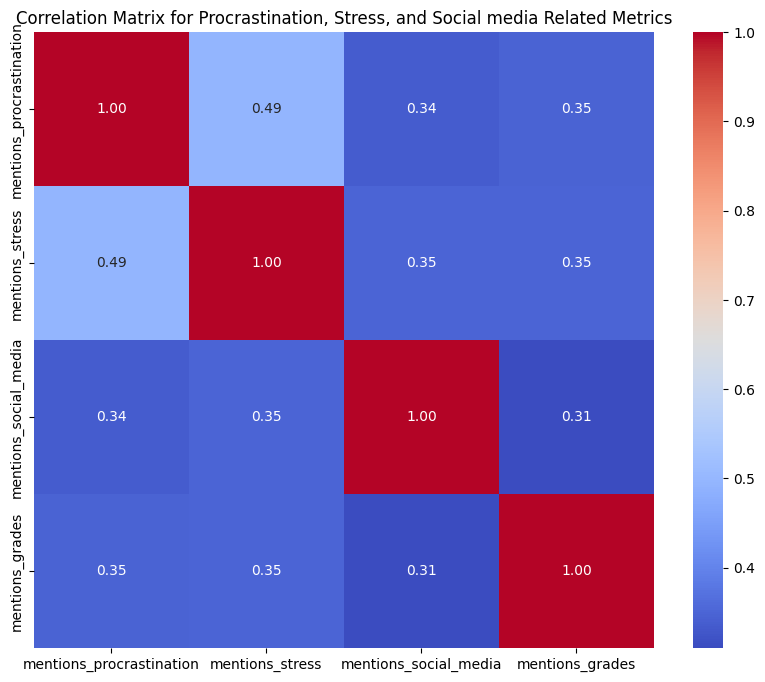

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Procrastination, Stress, and Social media Related Metrics')
plt.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Convert boolean mentions to integers for regression analysis
data['mentions_stress'] = data['mentions_stress'].astype(int)
data['mentions_procrastination'] = data['mentions_procrastination'].astype(int)

# Adding a constant for the intercept
X = sm.add_constant(data['mentions_stress'])  # Independent variable
y = data['mentions_procrastination']          # Dependent variable

model = sm.OLS(y, X).fit()
print(model.summary())


                               OLS Regression Results                               
Dep. Variable:     mentions_procrastination   R-squared:                       0.244
Model:                                  OLS   Adj. R-squared:                  0.243
Method:                       Least Squares   F-statistic:                     336.0
Date:                      Sun, 14 Apr 2024   Prob (F-statistic):           2.79e-65
Time:                              22:21:56   Log-Likelihood:                 53.469
No. Observations:                      1045   AIC:                            -102.9
Df Residuals:                          1043   BIC:                            -93.03
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

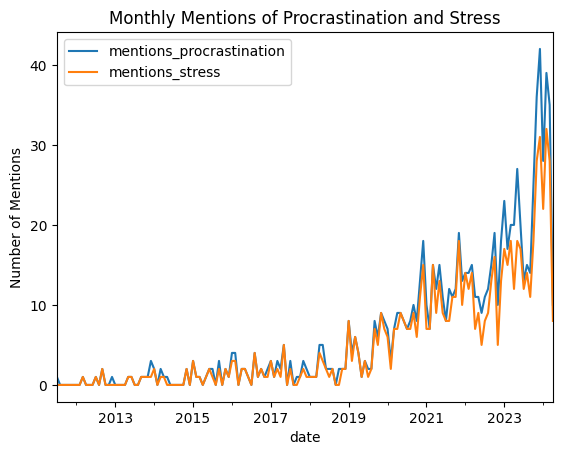

In [29]:
import matplotlib.pyplot as plt

# Convert 'date' to datetime and set as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Resample data monthly and sum mentions
monthly_data = data.resample('M').sum()

# Plotting the time series of mentions
monthly_data[['mentions_procrastination', 'mentions_stress']].plot()
plt.title('Monthly Mentions of Procrastination and Stress')
plt.ylabel('Number of Mentions')
plt.show()


In [ ]:
from scipy.stats import pearsonr

# Calculate Pearson correlation and p-values between procrastination and social media
corr, p_value = pearsonr(data['mentions_procrastination'], data['mentions_social_media'])
print(f'Correlation: {corr}, p-value: {p_value}')

corr, p_value = pearsonr(data['mentions_procrastination'], data['mentions_stress'])
print(f'Correlation: {corr}, p-value: {p_value}')

corr, p_value = pearsonr(data['mentions_procrastination'], data['mentions_grades'])
print(f'Correlation: {corr}, p-value: {p_value}')



Correlation: 0.3353197702664093, p-value: 7.067922349360554e-29
Correlation: 0.4936290202076946, p-value: 2.7931006484450573e-65
Correlation: 0.34666498318056654, p-value: 7.112914309996358e-31


In [ ]:
data

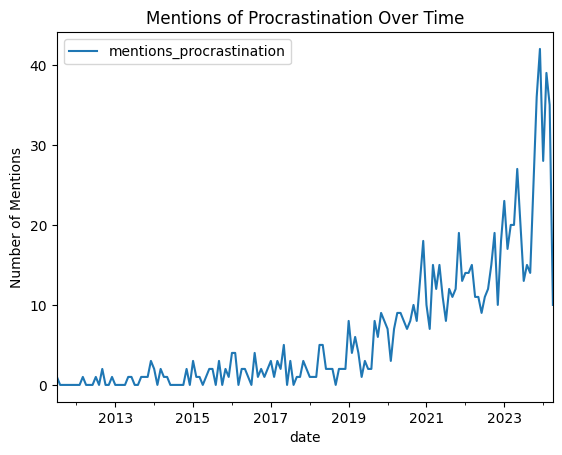

In [20]:
# Resample data monthly and sum mentions
monthly_data = data.resample('M').sum()

# Plotting the time series of mentions
monthly_data[['mentions_procrastination']].plot()
plt.title('Mentions of Procrastination Over Time')
plt.ylabel('Number of Mentions')
plt.show()


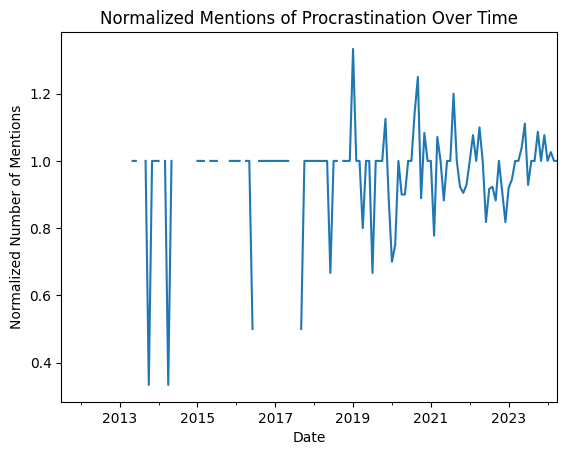

In [35]:
import pandas as pd
import matplotlib.pyplot as plt



# Resample data monthly and sum mentions of procrastination
monthly_mentions = data['mentions_procrastination'].resample('M').sum()

# Get monthly post count
monthly_post_count = data['id'].resample('M').nunique()

# Normalize mentions by monthly post count
normalized_mentions = monthly_mentions / monthly_post_count

# Plotting the normalized time series
normalized_mentions.plot()
plt.title('Normalized Mentions of Procrastination Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Number of Mentions')
plt.show()


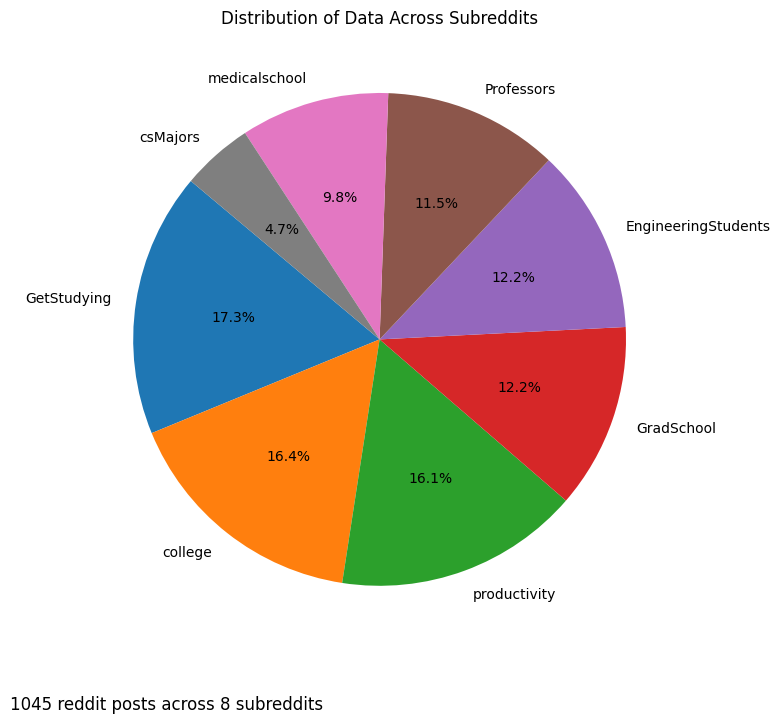

In [ ]:
# Count the occurrences of each subreddit
subreddit_counts = data['subreddit'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 8))
subreddit_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Data Across Subreddits')
plt.ylabel('')

plt.text(-1.5, -1.5, '1045 reddit posts across 8 subreddits', fontsize=12, color='black')

plt.show()

In [ ]:
social_media_keywords = ['Facebook', 'Instagram', 'Twitter', 'Snapchat', 'TikTok', 'Netflix', 'YouTube',
                         'social media', 'post', 'share', 'like', 'comment', 'scrolling', 'watching'
                         'story', 'shorts', 'reels', 'videos', 'photos', 'tweets'
                         ]

social_media_keywords_lemmatized = lemmatize_keywords(social_media_keywords)

data['mentions_social_media'] = data['post'].apply(lambda x: keyword_check(x, social_media_keywords_lemmatized)).astype(int)

covid_keywords = [
    "pandemic",
    "covid",
    "coronavirus",
    "covid-19",
    "lockdown",
    "social distancing",
    "spread",
    "delta",
    "omicron",
    "online learning",
    "online classes",
    "remote",
    "remote learning",
    "hybrid classes",
    "hybrid learning"
]
covid_keywords_lemmatized = lemmatize_keywords(covid_keywords)

data['mentions_covid'] = data['post'].apply(lambda x: keyword_check(x, covid_keywords_lemmatized)).astype(int)
# Calculate correlation matrix including social media mentions
correlation_matrix = data[['mentions_procrastination', 'mentions_stress', 'mentions_social_media', 'mentions_grades']].corr()
print(correlation_matrix)

                          mentions_procrastination  mentions_stress  \
mentions_procrastination                  1.000000         0.493629   
mentions_stress                           0.493629         1.000000   
mentions_social_media                     0.389496         0.389512   
mentions_grades                           0.346665         0.349138   
mentions_covid                            0.249058         0.324101   

                          mentions_social_media  mentions_grades  \
mentions_procrastination               0.389496         0.346665   
mentions_stress                        0.389512         0.349138   
mentions_social_media                  1.000000         0.307504   
mentions_grades                        0.307504         1.000000   
mentions_covid                         0.257233         0.297691   

                          mentions_covid  
mentions_procrastination        0.249058  
mentions_stress                 0.324101  
mentions_social_media           0.2

In [ ]:
# Define new titles
new_titles = {
    'mentions_procrastination': 'Procrastination',
    'mentions_stress': 'Stress',
    'mentions_social_media': 'Social Media',
    'mentions_grades': 'Grades',
    'mentions_covid': 'COVID'
}

# Rename columns and index
correlation_matrix = correlation_matrix.rename(columns=new_titles, index=new_titles)

# Print the renamed correlation matrix
print(correlation_matrix)

                 Procrastination    Stress  Social Media    Grades     COVID
Procrastination         1.000000  0.493629      0.389496  0.346665  0.249058
Stress                  0.493629  1.000000      0.389512  0.349138  0.324101
Social Media            0.389496  0.389512      1.000000  0.307504  0.257233
Grades                  0.346665  0.349138      0.307504  1.000000  0.297691
COVID                   0.249058  0.324101      0.257233  0.297691  1.000000


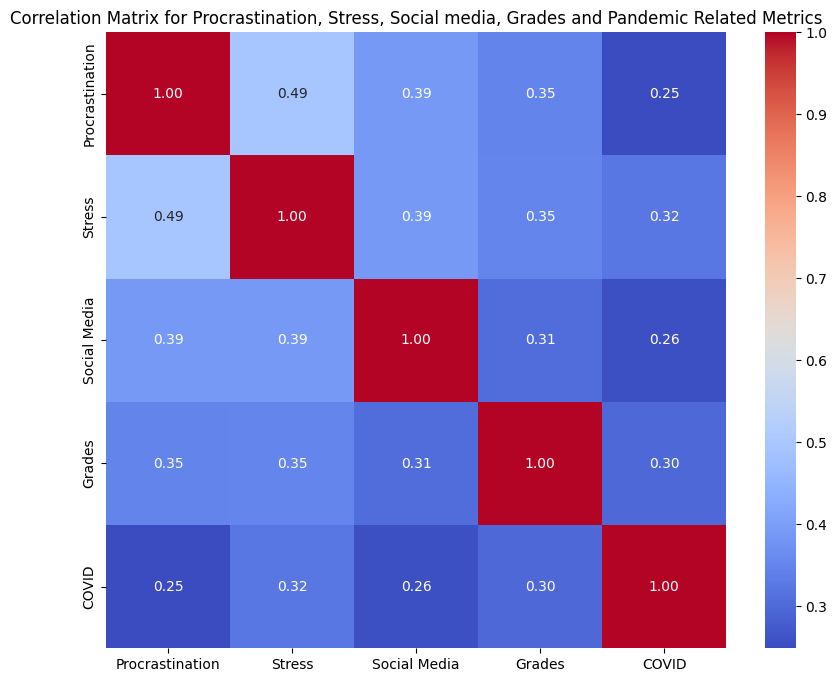

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Procrastination, Stress, Social media, Grades and Pandemic Related Metrics')
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import pearsonr


# Define the features for which you want to calculate p-values
features = ['mentions_procrastination', 'mentions_social_media', 'mentions_covid', 'mentions_grades', 'mentions_stress']

# Initialize an empty DataFrame to store p-values
p_values_df = pd.DataFrame(index=features[1:], columns=['p-value'])

# Calculate p-values for each feature with 'mentions_procrastination'
for feature in features[1:]:
    _, p_value = pearsonr(data['mentions_procrastination'], data[feature])
    p_values_df.loc[feature, 'p-value'] = '{:e}'.format(p_value)


# # Display the p-values DataFrame in scientific notation
# print("P-values for correlation with mentions_procrastination:")
# print(p_values_df)

# Output the p-values DataFrame as a LaTeX table
latex_table = p_values_df.to_latex()

# Print the LaTeX table
print("P-values for correlation with mentions_procrastination:")
print(latex_table)

P-values for correlation with mentions_procrastination:
\begin{tabular}{ll}
\toprule
 & p-value \\
\midrule
mentions_social_media & 3.439375e-39 \\
mentions_covid & 3.068524e-16 \\
mentions_grades & 7.112914e-31 \\
mentions_stress & 2.793101e-65 \\
\bottomrule
\end{tabular}



In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Define the features for which you want to calculate p-values
features = ['mentions_procrastination', 'mentions_social_media', 'mentions_covid', 'mentions_grades', 'mentions_stress']

# Initialize an empty DataFrame to store p-values
p_values_df = pd.DataFrame(index=features[1:], columns=['P-value'])

# Calculate p-values for each feature with 'mentions_procrastination'
for feature in features[1:]:
    _, p_value = pearsonr(data['mentions_procrastination'], data[feature])
    p_values_df.loc[feature, 'P-value'] = '{:e}'.format(p_value)

# Display the p-values DataFrame
print("P-values for correlation with mentions_procrastination:")
print(p_values_df)


P-values for correlation with mentions_procrastination:
                            P-value
mentions_social_media  3.439375e-39
mentions_covid         3.068524e-16
mentions_grades        7.112914e-31
mentions_stress        2.793101e-65


In [ ]:
import matplotlib.pyplot as plt

# Convert 'date' to datetime and set as index
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Resample data monthly and sum mentions
monthly_data = data.resample('M').sum()

# Plotting the time series of mentions
monthly_data[['mentions_procrastination', 'mentions_stress']].plot()
plt.title('Monthly Mentions of Procrastination and Stress')
plt.ylabel('Number of Mentions')
plt.show()

In [ ]:
from gensim import corpora, models
import gensim
import nltk
from nltk.corpus import stopwords
import re

# Assume your data is loaded into a DataFrame `df` and filtered to include relevant posts
documents = df['post'].tolist()

keywords = ['solution', 'tip', 'srategy', 'advice', 'overcome', 'solutions']


filtered_documents = [doc for doc in documents if any(keyword in doc.lower() for keyword in keywords)]

filtered_documents += df[df['query'] == 'solutions']['post'].tolist()

filtered_documents = list(set(filtered_documents))

nltk.download('stopwords')




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


(0, '0.007*"*" + 0.007*"get" + 0.006*"time" + 0.005*"like"')
(1, '0.010*"i\'m" + 0.007*"get" + 0.007*"like" + 0.006*"time"')
(2, '0.009*"time" + 0.006*"get" + 0.006*"*" + 0.005*"work"')
(3, '0.009*"i\'m" + 0.007*"like" + 0.006*"time" + 0.006*"get"')
(4, '0.009*"like" + 0.007*"i\'m" + 0.007*"get" + 0.007*"time"')


In [ ]:
# Text preprocessing
stop_words = stopwords.words('english')

custom_stopwords = ['like', 'help', 'get', "i'm", "work", "time", "really",
                    "procrastination", "make", "feel", "would", "one",
                    "you're", "need", "want", "know", "even", ]

stop_words.extend(custom_stopwords)
texts = [[word for word in document.lower().split() if word not in stop_words]
         for document in filtered_documents]

# Create a dictionary and corpus for topic modeling
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Applying LDA
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word = dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.004*"much" + 0.004*"i’m" + 0.003*"something" + 0.003*"think"')
(1, '0.007*"-" + 0.003*"also" + 0.003*"i\'ve" + 0.002*"going"')
(2, '0.006*"*" + 0.005*"study" + 0.004*"go" + 0.004*"i\'ve"')
(3, '0.006*"i’m" + 0.005*"don’t" + 0.005*"it’s" + 0.003*"school"')
(4, '0.004*"*" + 0.004*"start" + 0.004*"study" + 0.004*"much"')


In [ ]:
filtered_documents